## Solution of Ordinary Differential Equation

# Eular's method

In this code we are finding the solution of a differential euation $y'=-2y$ with initial values as $y(0)=1$. In this case we know the exact solution and the exact solution is given by $y(t) = e^{-2t}$. We shall compare the exact solution and compare it with the numeriaclly obtained solution from Euler's method.

Euler's method is the simplest numerical scheme to approximate the solution of an ODE.  
It uses the slope at the beginning of the interval to estimate the value of the solution at the next step.  
If $h$ is the step size, the iteration formulas are
\begin{equation}
y_{n+1} = y_n + h \, f(x_n, y_n),
\end{equation}
\begin{equation}
x_{n+1} = x_n + h.
\end{equation}
Euler's method is \emph{first-order accurate}, meaning the global error decreases linearly with the step size $h$.

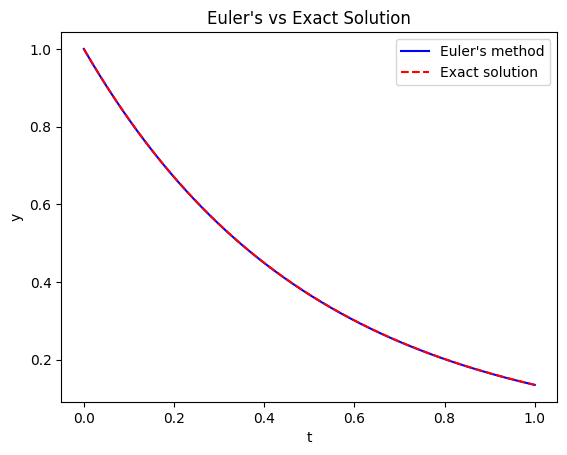

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def func(t,y):
    f = -2.0*y
    return f

def euler_rec(h,t0, y0):
    y1 = y0 + h*func(t0, y0)
    return y1

def plot(method,t,y,yex):
    plt.plot(t,y,'b-',label = "{} method".format(method))
    plt.plot(t,yex,'r--',label = "Exact solution")
    plt.xlabel("t")
    plt.ylabel("y")
    plt.title("{} vs Exact Solution".format(method))
    plt.legend()
    plt.show()

t0 = 0.0
y0 = 1.0
h = 0.001
t1 = 1.0
t, y, yex = [t0] , [y0] , [y0]

while t0<1:
    y1 = euler_rec(h,t0,y0)
    yexi = np.exp(-2.0*(t0+h))
    y0 = y1
    t.append(t0+h)
    y.append(y1)
    yex.append(yexi)
    t0= t0+h

plot("Euler's",t,y,yex)

# Runge Kutta Method

We shall solve the same equation we solved earlier.

The RK4 method improves accuracy by evaluating the slope at several points within each interval and taking a weighted average.  
The formulas are

\begin{equation}
k_1 = f(x_n, y_n),
\end{equation}
\begin{equation}
k_2 = f\!\Big(x_n + \tfrac{h}{2}, \; y_n + \tfrac{h}{2}k_1\Big),
\end{equation}
\begin{equation}
k_3 = f\!\Big(x_n + \tfrac{h}{2}, \; y_n + \tfrac{h}{2}k_2\Big),
\end{equation}
\begin{equation}
k_4 = f\!\Big(x_n + h, \; y_n + h k_3\Big),
\end{equation}
\begin{equation}
y_{n+1} = y_n + \frac{h}{6}\big(k_1 + 2k_2 + 2k_3 + k_4\big),
\end{equation}
\begin{equation}
x_{n+1} = x_n + h.
\end{equation}

The RK4 method is \emph{fourth-order accurate}, so its global error decreases proportionally to $h^4$.  
It provides a very good balance between accuracy and computational effort, and is one of the most widely used methods for solving ODEs numerically.



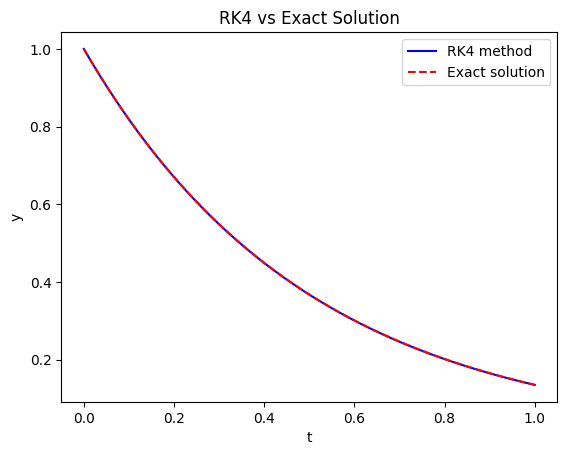

In [2]:
def func(t,y):
    f = -2.0*y
    return f

RK4_k1 = lambda t0,y0 : func(t0,y0)
RK4_k2 = lambda h, t0, y0 : func((t0+ h/2.0), (y0 + (h/2.0)*RK4_k1(t0,y0)))
RK4_k3 = lambda h, t0, y0 : func((t0+ h/2.0), (y0 + (h/2.0)*RK4_k2(h, t0,y0)))
RK4_k4 = lambda h, t0, y0 : func((t0+ h), (y0 + h*RK4_k3(h, t0,y0)))
RK4_iter = lambda h, t0, y0 : y0 + (h/6.0)*(RK4_k1(t0,y0) + 2.0 * RK4_k2(h,t0,y0) + 2.0 * RK4_k3(h,t0,y0) + RK4_k4(h,t0,y0))

t0 = 0.0
y0 = 1.0
h = 0.001
t1 = 1.0
t, y, yex = [t0] , [y0] , [y0]

while t0<1:
    y1 = euler_rec(h,t0,y0)
    yexi = np.exp(-2.0*(t0+h))
    y0 = y1
    t.append(t0+h)
    y.append(y1)
    yex.append(yexi)
    t0= t0+h

plot("RK4",t,y,yex)